In [71]:
#Importing the required modules
import numpy as np
from scipy.stats import mode
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [72]:
#importing the dataset
df= pd.read_csv("diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [73]:
#positioning the target variable price to the last
target_column = df.pop('price')
  
df.insert(9, 'price', target_column)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [74]:
#type of data
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [75]:
#shape of dataset
df.shape

(53940, 10)

In [76]:
# Summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [77]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [78]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [79]:
# Numerical Columns

num_data = df.select_dtypes(['int64','float64'])

num_cols = num_data.columns

print('Numerical Columns : {}'.format(list(num_cols)))

Numerical Columns : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


In [80]:
# Categorical Columns

cat_data = df.select_dtypes(['object'])

cat_cols = cat_data.columns

print('categorical Columns : {}'.format(list(cat_cols)))

categorical Columns : ['cut', 'color', 'clarity']


In [81]:
# Now we can see the null values 
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
x          False
y          False
z          False
price      False
dtype: bool

<AxesSubplot:xlabel='color', ylabel='price'>

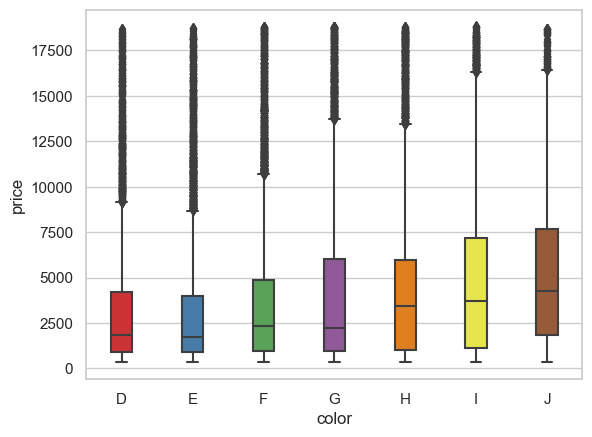

In [82]:
sns.boxplot(y='price',data=df,x='color',palette ='Set1',width =0.3,order = ['D','E','F','G','H','I','J'] )

<AxesSubplot:xlabel='cut', ylabel='price'>

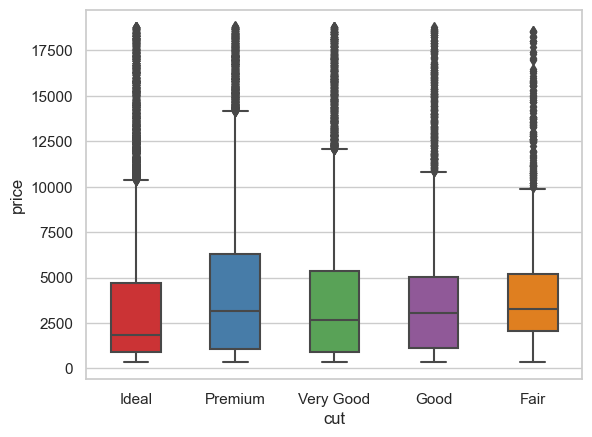

In [83]:
sns.boxplot(y='price',data=df,x='cut',palette ='Set1', width =0.5,order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] )

<AxesSubplot:xlabel='clarity', ylabel='price'>

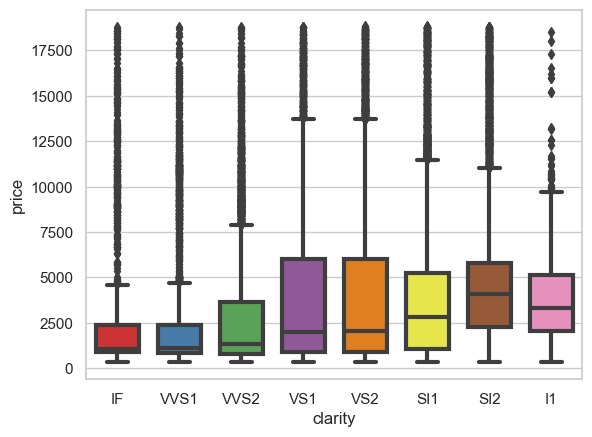

In [84]:
sns.boxplot(y='price',data=df,x='clarity',palette ='Set1', width =0.7,linewidth=3,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

<AxesSubplot:xlabel='clarity'>

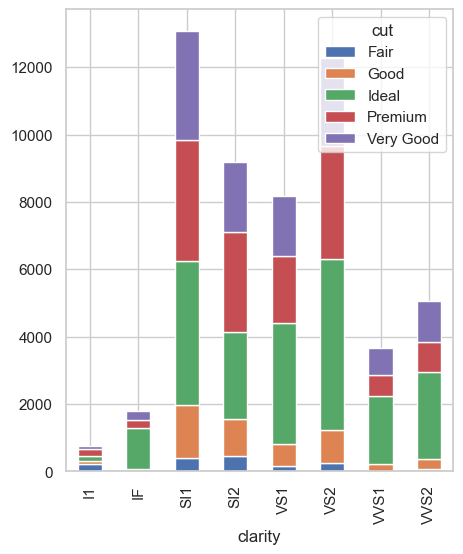

In [85]:
clarity_cut_table = pd.crosstab(index=df["clarity"], columns=df["cut"])

clarity_cut_table.plot(kind="bar", 
                 figsize=(5,6),
                 stacked=True)

<AxesSubplot:xlabel='cut'>

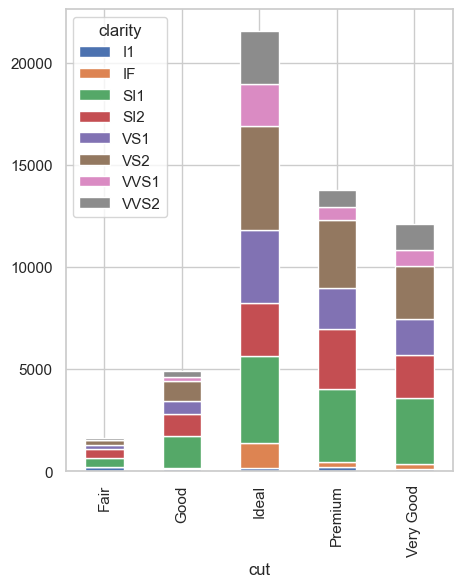

In [86]:
cut_clarity_table = pd.crosstab(index=df["cut"], columns=df["clarity"])

cut_clarity_table.plot(kind="bar", 
                 figsize=(5,6),
                 stacked=True)

<AxesSubplot:xlabel='color'>

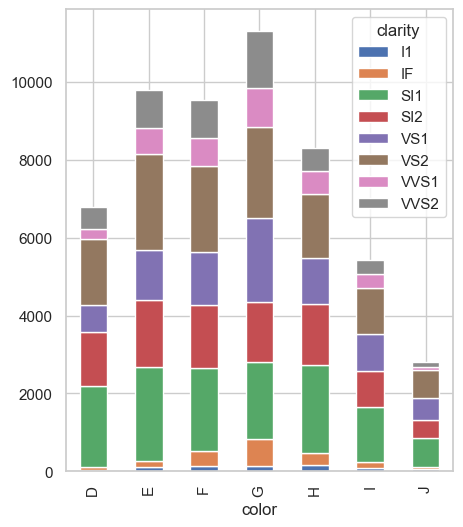

In [87]:
color_clarity_table = pd.crosstab(index=df["color"], columns=df["clarity"])

color_clarity_table.plot(kind="bar", 
                 figsize=(5,6),
                 stacked=True)

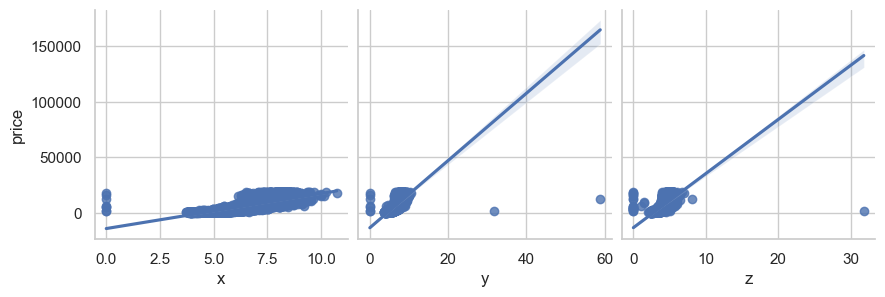

In [88]:
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['x','y','z'] , y_vars =  ['price'] , kind = 'reg')

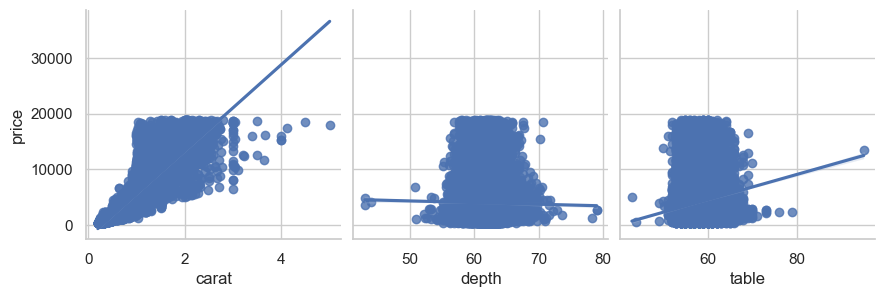

In [89]:
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['carat','depth', 'table'] , y_vars =  ['price'] , kind = 'reg')

In [90]:
# Splitting the columns

X = df.iloc[:,:-1]

y = df.iloc[:,-1]

In [91]:
#Train and test data 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

preparing train data on numerical columns

In [92]:
#train data for numerical columns
X_train_num= X_train.select_dtypes(include=['int64','float64'])


In [93]:
#scaling the train numerical solumns 
scaler= StandardScaler()
X_train_num_rescaled= pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)

preparing test data on numerical columns

In [94]:
X_test_num= X_test.select_dtypes(include=['int64','float64'])

In [95]:
#scaling the test numerical columns
X_test_num_rescaled= pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

Preparing for train data of categorical columns

In [96]:
#train and test data for categorical columns
X_train_cat= X_train.select_dtypes(include=['object'])



In [97]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
441
50332
35652
9439
15824


In [98]:
X_train_cat.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [99]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,cut
441,5
50332,3
35652,4
9439,3
15824,2


In [100]:
X_train_cat.color.unique()

array(['H', 'D', 'G', 'F', 'I', 'E', 'J'], dtype=object)

In [101]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

X_train_cat_le.head()

,cut,color
441,5,3
50332,3,7
35652,4,4
9439,3,3
15824,2,5


In [102]:
X_train_cat.clarity.unique()

array(['SI2', 'SI1', 'VVS2', 'VS1', 'VS2', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [103]:
clarity_encoder ={'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()

,cut,color,clarity
441,5,3,2
50332,3,7,3
35652,4,4,6
9439,3,3,5
15824,2,5,4


preparing test data on catgorical columns

In [104]:
X_test_cat= X_test.select_dtypes(include=['object'])

In [105]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)

In [106]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()

,cut,color,clarity
10176,4,3,2
16083,4,3,3
13420,5,2,3
20407,4,5,3
8909,3,5,4


Concatinating the Encoded Categorical Features and Rescaled Numerical Features ON Train data:

In [107]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
441,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528,5,3,2
50332,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918,3,7,3
35652,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861,4,4,6
9439,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154,3,3,5
15824,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137,2,5,4


Concatinating the Encoded Categorical Features and Rescaled Numerical Features ON Test data:

In [108]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
10176,0.637687,0.171139,-1.100252,0.783997,0.795591,0.805657,4,3,2
16083,1.038286,0.590084,-0.651597,1.095792,1.038670,1.143803,4,3,3
13420,0.848529,-0.457279,0.245713,1.024525,0.925812,0.904283,5,2,3
20407,1.481053,-0.596928,-0.651597,1.514489,1.411971,1.355144,4,5,3
8909,0.216004,-0.038334,-0.202942,0.392025,0.413609,0.397064,3,5,4


### Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
l_regressor = LinearRegression()
l_regressor.fit(X_train_transformed, y_train)
y_test_pred = l_regressor.predict(X_test_transformed)

# calculate accuracy of class predictions
metrics.r2_score(y_test, y_test_pred)

0.9082426622759366

### KNN Regressor


In [110]:
from sklearn.neighbors import KNeighborsRegressor
k_regressor = KNeighborsRegressor()
k_regressor.fit(X_train_transformed, y_train)
y_test_pred = k_regressor.predict(X_test_transformed)

# calculate accuracy of class predictions
metrics.r2_score(y_test, y_test_pred)

0.9671427891590718

### Decision Tree

In [111]:
from sklearn.tree import DecisionTreeRegressor
d_regressor = DecisionTreeRegressor()
d_regressor.fit(X_train_transformed, y_train)
y_test_pred = d_regressor.predict(X_test_transformed)

# calculate accuracy of class predictions
metrics.r2_score(y_test, y_test_pred)

0.9651379296897659

### Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor
r_regressor = RandomForestRegressor()
r_regressor.fit(X_train_transformed, y_train)
y_test_pred = r_regressor.predict(X_test_transformed)

# calculate accuracy of class predictions
metrics.r2_score(y_test, y_test_pred)

0.9801642019882869

In [113]:
import mlflow

In [114]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")

mlflow.set_experiment("Diamond Price Prediction")

<Experiment: artifact_location='./mlruns/1', experiment_id='1', lifecycle_stage='active', name='Diamond Price Prediction', tags={}>

In [115]:
from pickle import dump

dump(scaler, open('standard_scaler.pkl', 'wb'))


Training Knn 

In [116]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Riya")
    mlflow.set_tag("algo", "KNN")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "diamonds.csv")
    k = 9
    mlflow.log_param("n_neighbors", k)
    knn_classifier = KNeighborsRegressor(n_neighbors=k)
    knn_classifier.fit(X_train_transformed, y_train)
    y_test_pred = knn_classifier.predict(X_test_transformed)
    acc = metrics.r2_score(y_test, y_test_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(knn_classifier, artifact_path="models")
    mlflow.log_artifact("standard_scaler.pkl")

training randomForest 

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Riya")
    mlflow.set_tag("algo", "RF")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "diamonds.csv")
    
    rf_classifier= RandomForestRegressor()
    rf_classifier.fit(X_train_transformed, y_train)
    y_test_pred = knn_classifier.predict(X_test_transformed)
    acc = metrics.r2_score(y_test, y_test_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(rf_classifier, artifact_path="models")
    mlflow.log_artifact("standard_scaler.pkl")

training decision_tree

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Riya")
    mlflow.set_tag("algo", "DT")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "diamonds.csv")
    depth = 3
    mlflow.log_param("max_depth", depth)
    dt_classifier= DecisionTreeRegressor(max_depth=depth)
    dt_classifier.fit(X_train_transformed, y_train)
    y_test_pred = knn_classifier.predict(X_test_transformed)
    acc = metrics.r2_score(y_test, y_test_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(dt_classifier, artifact_path="models")
    mlflow.log_artifact("standard_scaler.pkl")

training SVM

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Riya")
    mlflow.set_tag("algo", "SVR")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "diamonds.csv")
    from sklearn.svm import SVR
    regressor = SVR(kernel = 'linear')
    regressor.fit(X_train_transformed, y_train)
    y_test_pred = regressor.predict(X_test_transformed)
    acc = metrics.r2_score(y_test, y_test_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(regressor, artifact_path="models")
    mlflow.log_artifact("standard_scaler.pkl")

training linear regression

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Riya")
    mlflow.set_tag("algo", "LR")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "diamonds.csv")
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train_transformed, y_train)
    y_test_pred = linear_regressor.predict(X_test_transformed)
    acc = metrics.r2_score(y_test, y_test_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(regressor, artifact_path="models")
    mlflow.log_artifact("standard_scaler.pkl")